## 🔎 Exploratory analysis of [Fake News](https://www.kaggle.com/datasets/algord/fake-news) Dataset

In [1]:
import pandas as pd

# https://www.kaggle.com/datasets/algord/fake-news
df = pd.read_csv("../local_datasets/FakeNewsNet.csv", sep=",")
df

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
...,...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0


### 🧾 Information about the dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


### 🧾 Size of the dataset (rows and columns)

In [3]:
print("Size:", df.shape)

Size: (23196, 5)


### 📃 Columns description in the dataset
- `title`: the title of the news article.
- `news_url`: the URL of the news article.
- `source_domain`: the website from which the news article originates.
- `tweet_num`: number of retweets the news article has received.
- `real`: a binary label indicating whether the article is real (1) or fake (0).

### 📃 Check for missing values in the dataset

Let's check if there are any missing values in the dataset.

In [4]:
print(df.isnull().sum())

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64


### 📃 Check for duplicates

In [5]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 137


### 🧾 Number of true vs fake news

We can check the number of true vs fake news in the dataset, in order to see if the dataset is balanced or not.

In [6]:
real_news_count = df['real'].value_counts()[1]
fake_news_count = df['real'].value_counts()[0]
real_news_percent = (real_news_count / (real_news_count + fake_news_count)) * 100
fake_news_percent = (fake_news_count / (real_news_count + fake_news_count)) * 100
print("Number of real news articles:", real_news_count, "({:.2f}%)".format(real_news_percent))
print("Number of fake news articles:", fake_news_count, "({:.2f}%)".format(fake_news_percent))


Number of real news articles: 17441 (75.19%)
Number of fake news articles: 5755 (24.81%)


The difference between real and fake news articles is important. The dataset is not balanced.

Here a graphical representation of the number of true vs fake news articles.

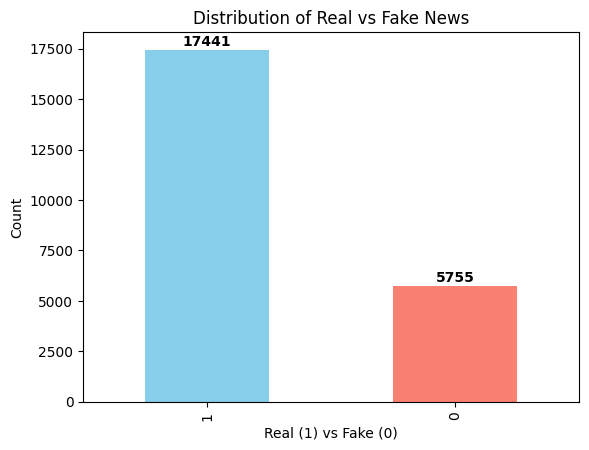

In [7]:
import matplotlib.pyplot as plt

ax = df["real"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Real (1) vs Fake (0)")
plt.ylabel("Count")

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2, # type: ignore
        p.get_height() + 50, # type: ignore
        f"{int(p.get_height())}", # type: ignore
        ha="center",
        va="bottom",   
        fontsize=10,
        fontweight="bold",
        color="black"
    )
    
plt.show()

Let's now examine whether the veracity of a news is influenced by other variables. For example, let's compare the average number of retweets depending on whether the news is false or not.

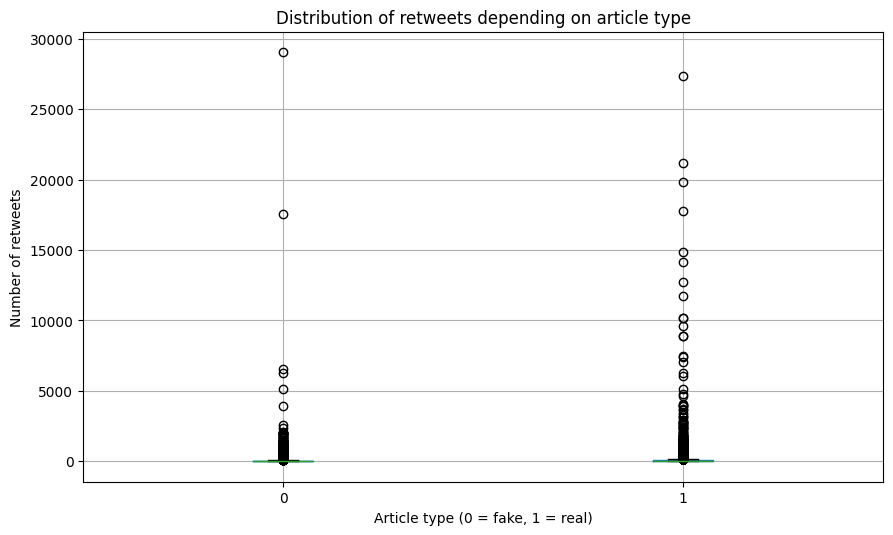


Descriptive statistics of retweets by article type:
        count        mean         std  min   25%   50%   75%      max
real                                                                 
0      5755.0  132.693484  548.213358  0.0   5.0  13.0  51.0  29060.0
1     17441.0   74.525027  466.513358  0.0  17.0  44.0  66.0  27377.0


In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='tweet_num', by='real', ax=ax)
ax.set_title('Distribution of retweets depending on article type')
ax.set_xlabel("Article type (0 = fake, 1 = real)")
ax.set_ylabel("Number of retweets")
plt.suptitle('') 
plt.show()

print("\nDescriptive statistics of retweets by article type:")
print(df.groupby('real')['tweet_num'].describe())

Real news receives significantly more retweets than fake news, with higher median and greater variability in engagement but fake news have extreme outliers that make the mean much higher than the mean of real articles.

### 🧾 Check domains with most articles

In [ ]:
domain_counts = df[df['source_domain'].notna() & (df['source_domain'] != '')]['source_domain'].value_counts().reset_index()
domain_counts.columns = ['source_domain', 'count']

print("\nTop 20 domains with most articles (without taking acount the duplicate rows):")
domain_counts.head(20)


Top 20 domains with most articles (without taking acount the duplicate rows):


,source_domain,count
0,people.com,1786
1,www.dailymail.co.uk,964
2,en.wikipedia.org,741
3,www.usmagazine.com,709
4,www.etonline.com,666
5,www.longroom.com,549
6,hollywoodlife.com,524
7,www.usatoday.com,332
8,www.hollywoodreporter.com,330
9,variety.com,304


In [10]:
top_20_domains = domain_counts.head(20)['source_domain'].tolist()
analysis_results = []

for domain in top_20_domains:
    domain_df = df[df['source_domain'] == domain]
    
    fake_count = (domain_df['real'] == 0).sum()
    real_count = (domain_df['real'] == 1).sum()
    total_count = len(domain_df)
    news_type = "More FAKE news" if fake_count > real_count else ("More REAL news" if real_count > fake_count else "EQUAL")
    
    analysis_results.append({
        'source_domain': domain,
        'total_articles': total_count,
        'fake_news': fake_count,
        'real_news': real_count,
        'type': news_type
    })

analysis_df = pd.DataFrame(analysis_results)
print("Analysis of Top 20 Domains - Fake vs Real News:")
analysis_df

Analysis of Top 20 Domains - Fake vs Real News:


,source_domain,total_articles,fake_news,real_news,type
0,people.com,1786,216,1570,More REAL news
1,www.dailymail.co.uk,964,194,770,More REAL news
2,en.wikipedia.org,741,123,618,More REAL news
3,www.usmagazine.com,709,147,562,More REAL news
4,www.etonline.com,666,81,585,More REAL news
5,www.longroom.com,549,0,549,More REAL news
6,hollywoodlife.com,524,460,64,More FAKE news
7,www.usatoday.com,332,32,300,More REAL news
8,www.hollywoodreporter.com,330,32,298,More REAL news
9,variety.com,304,45,259,More REAL news


Before the pre-processing, we can see that for the top 20 domains of the dataset that they contains much more real news than fake news

### 🧾 Conclusion and main outcomes
In this notebook, we have explored the Fake News dataset. We have achieved the following outcomes:
- The dataset is very big, containing almost 23k articles.
- The dataset is not balanced, with 17.364 fake news vs 5.493 real news articles.
- Checked the link with another feature
- Checked the distribution of Title and URL Lengths

The next step is to pre-process the dataset in order to prepare it for training and evaluation of the chatbots.